# Minicurso de Lógica Fuzzy - AutomataIF
---
## Prof. Ms. Petrônio Cândido
petronio.candido@gmail.com / petronio.candido@ifnmg.edu.br
### IFNMG - Campus Januária

In [1]:
# Importações comuns 

import numpy as np # biblioteca para processamento numérico
import matplotlib.pyplot as plt # biblioteca para geração de gráficos
%pylab inline

Populating the interactive namespace from numpy and matplotlib


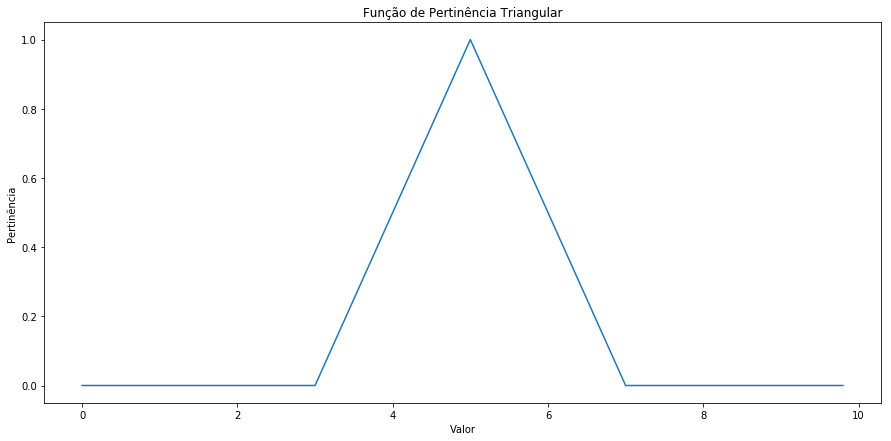

In [2]:
#definição da função de pertinência triangular

def triangular(x, parametros):
    return max( min( (x-parametros[0])/(parametros[1]-parametros[0]), 
                    (parametros[2]-x)/(parametros[2]-parametros[1]) ), 0 )


#gera uma sequencia de números de 0 à 10, com passos de 0.2

valores = np.arange(0,10,0.2)

# calcula os valores de pertinência para cada um dos valores

pertinencias = [ triangular(x, [3, 5, 7]) for x in valores ]

# gera o gráfico da função
plt.figure(figsize=(15,7))
plot(valores, pertinencias)
xlabel("Valor")
ylabel("Pertinência")
title("Função de Pertinência Triangular")


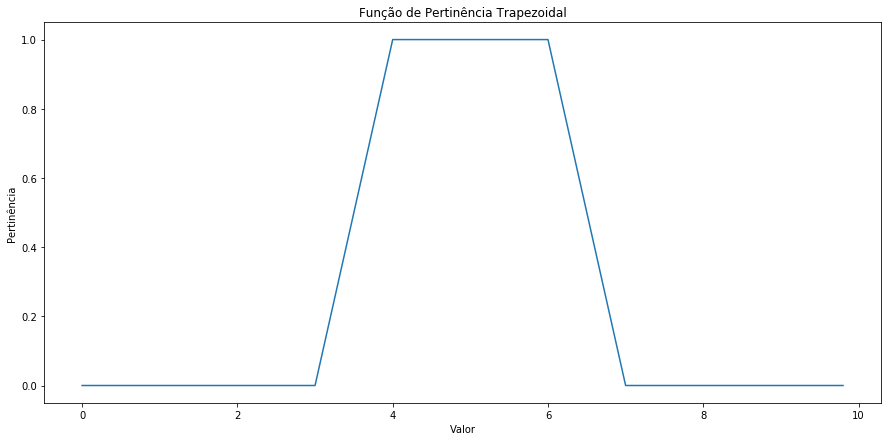

In [3]:
#definição da função de pertinência trapezoidal

def trapezoidal(x, parametros):
    if parametros[0] == parametros[1] and x == parametros[0]:
        return 1
    elif parametros[2] == parametros[3] and x == parametros[2]:
        return 1
    else:
        return max(min( (x-parametros[0])/(parametros[1]-parametros[0]), 1, 
                       (parametros[3]-x)/(parametros[3]-parametros[2]) ), 0 )


#gera uma sequencia de números de 0 à 10, com passos de 0.2

valores = np.arange(0,10,0.2)

# calcula os valores de pertinência para cada um dos valores

pertinencias = [ trapezoidal(x, [3, 4, 6, 7]) for x in valores ]

# gera o gráfico da função
plt.figure(figsize=(15,7))
plot(valores, pertinencias)
xlabel("Valor")
ylabel("Pertinência")
title("Função de Pertinência Trapezoidal")

In [4]:
# Um conjunto nebuloso

class ConjuntoNebuloso(object):
    
    def __init__(self, nome, funcao, parametros):
        self.nome = nome # o nome é geralmente o termo linguístico que o conjunto representa
        self.funcao_pertinencia = funcao # a função de pertinência que será usada
        self.parametros = parametros # os parâmetros da função de pertinência para esse conjunto
        
    def pertinencia(self, x):
        return self.funcao_pertinencia(x, self.parametros)
    
    def __str__(self):
        return self.nome + str(self.funcao_pertinencia) + "(" + str(self.parametros) + ")"
        
    

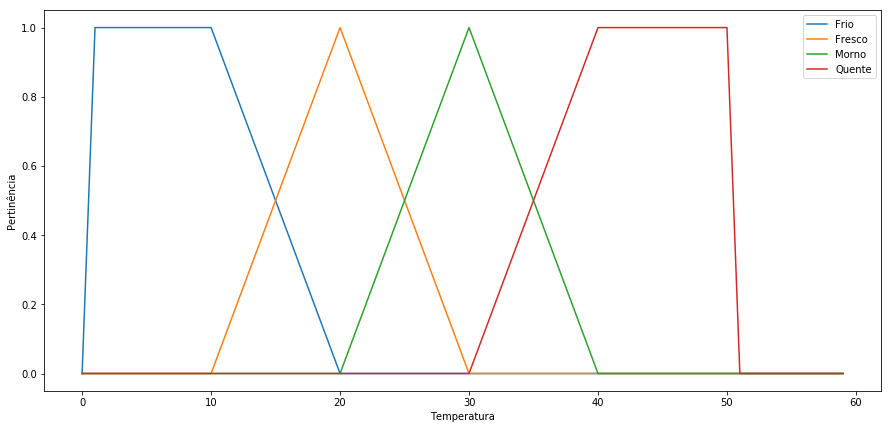

In [26]:
frio = ConjuntoNebuloso("Frio", trapezoidal, [0, 0.1, 10, 20])
fresco = ConjuntoNebuloso("Fresco", triangular, [10, 20, 30])
morno = ConjuntoNebuloso("Morno", triangular, [20, 30, 40])
quente = ConjuntoNebuloso("Quente", trapezoidal, [30, 40, 50, 50.1])

temperatura_celsius = np.arange(0,60)
temperatura_fuzzy = [frio, fresco, morno, quente]

plt.figure(figsize=(15,7))

for conjunto in temperatura_fuzzy:
    pertinencias = [ conjunto.pertinencia(x) for x in temperatura_celsius ]
    
    plot(temperatura_celsius, pertinencias, label = conjunto.nome)
    

xlabel("Temperatura")
ylabel("Pertinência")
legend(loc='upper right', shadow=False)
    

In [27]:
class Regra(object):
    
    def __init__(self, antecedente, consequente):
        self.antecedente = antecedente 
        self.consequente = consequente
        self.centro = np.mean(consequente.parametros)

    # calcula a pertinência da regra para uma entrada
    def entrada(self, x):
        self.pertinencia = self.antecedente.pertinencia(x)
        
    # calcula a saída da regra para a pertinência encontrada
    def saida(self):
        return self.centro * self.pertinencia
    
    def __str__(self):
        return "SE " + self.antecedente.nome + " ENTÃO " + self.consequente.nome
        

In [28]:
# Um modelo fuzzy é um conjunto de regras fuzzy

class Modelo(object):
    def __init__(self):
        self.regras = []
        
    
    #adiciona uma nova regra
    def adicionaRegra(self, antecedente, consequente):
        self.regras.append(Regra(antecedente, consequente))
        
    def processar(self, entrada, mostrar = False):
        saidas = 0
        pertinencias = 0
        imprime = ""
        for regra in self.regras:
            regra.entrada(entrada)
            
            saidas += regra.saida()
            pertinencias += regra.pertinencia
            
            if mostrar:
                print(str(round(regra.pertinencia,2)) + ": " + str(regra) + " --> " + str(regra.saida()))
            
        return saidas / pertinencias
    
    def __str__(self):
        ret = ""
        for regra in self.regras:
            ret += str(regra) + "\n"
            
        return ret

In [29]:
modelo = Modelo()

modelo.adicionaRegra(frio, quente)
modelo.adicionaRegra(fresco, morno)
modelo.adicionaRegra(morno, fresco)
modelo.adicionaRegra(quente, frio)

print(modelo)

SE Frio ENTÃO Quente
SE Fresco ENTÃO Morno
SE Morno ENTÃO Fresco
SE Quente ENTÃO Frio



In [30]:
modelo.processar(12, mostrar=True)

0.8: SE Frio ENTÃO Quente --> 34.02
0.2: SE Fresco ENTÃO Morno --> 6.0
0: SE Morno ENTÃO Fresco --> 0.0
0: SE Quente ENTÃO Frio --> 0.0


40.020000000000003

/usr/lib/python3/dist-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in double_scalars


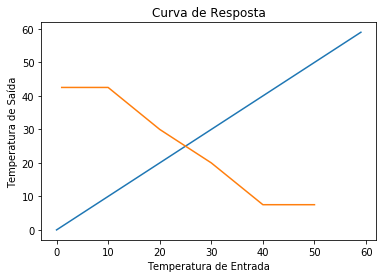

In [31]:
temperatura_celsius = np.arange(0,60)

temperatura_arcondicionado = [modelo.processar(x) for x in temperatura_celsius]

plot(temperatura_celsius, temperatura_celsius)
plot(temperatura_celsius, temperatura_arcondicionado)
title("Curva de Resposta")
xlabel("Temperatura de Entrada")
ylabel("Temperatura de Saída")


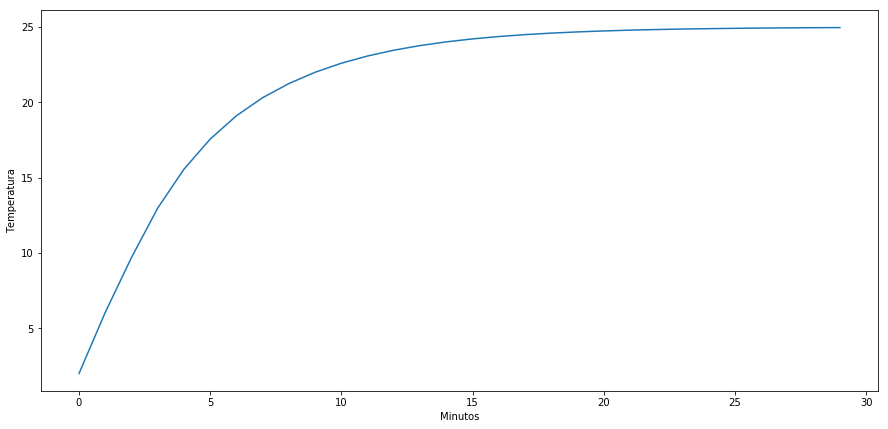

In [32]:
temperatura_atual = 2
temperaturas = []
for a in np.arange(0,30):
    temperaturas.append(temperatura_atual)
    nova = modelo.processar(temperatura_atual)
    temperatura_atual = temperatura_atual*0.9 + nova*0.1
    

plt.figure(figsize=(15,7))
plot(np.arange(0,30), temperaturas)
xlabel("Minutos")
ylabel("Temperatura")

# Controle Veicular

In [11]:
#Múltiplas entradas com uma saída simples (MISO - Multiple Input, Single Output)
class RegraMISO(Regra):
    
    def __init__(self, antecedente, consequente):
        super(RegraMISO, self).__init__(antecedente, consequente)

    # calcula a pertinência da regra para uma entrada
    def entrada(self, x):
        self.pertinencia = min([self.antecedente[i].pertinencia(x[i]) for i in np.arange(0, len(self.antecedente))])
        
    # calcula a saída da regra para a pertinência encontrada
    def saida(self):
        return self.centro * self.pertinencia
    
    def __str__(self):
        ret = "SE "
        for conj in self.antecedente:
            ret += conj.nome + " E "
        return  ret + " ENTÃO " + self.consequente.nome
    
# Um modelo fuzzy é um conjunto de regras fuzzy

class ModeloMISO(Modelo):
    def __init__(self, antecedente, consequente):
        super(ModeloMISO, self).__init__()
        self.antecedente = antecedente
        self.consequente = consequente
    
    #adiciona uma nova regra
    def adicionaRegra(self, antecedente, consequente):
        self.regras.append(RegraMISO(antecedente, consequente))
        
    def __str__(self):
        ret = ""
        for regra in self.regras:
            tmp = "" 
            for k in np.arange(0, len(self.antecedente)):
                if len(tmp) > 0: tmp += " E "
                tmp += self.antecedente[k] + " = " + regra.antecedente[k].nome
            ret += "SE " + tmp + " ENTÃO " + self.consequente + " = " + regra.consequente.nome + "\n"
            
        return ret
        

In [12]:
class Composicao(ConjuntoNebuloso):
    
    def __init__(self, nome, conjuntos):
        super(Composicao, self).__init__(nome, None, None)
        self.conjuntos = conjuntos
        if nome is None:
            self.nome = str(self)
        
    def pertinencia(self, x):
        pertinencias = [conjunto.pertinencia(x) for conjunto in self.conjuntos]
        return np.max(pertinencias)
    
    def __str__(self):
        ret = ""
        for c in self.conjuntos:
            if len(ret) > 1: ret += " OU "
            ret += c.nome
        return ret
    
class Conjuncao(ConjuntoNebuloso):
    
    def __init__(self, conjuntos):
        super(Conjuncao, self).__init__(None, None, None)
        self.conjuntos = conjuntos
        if self.nome is None:
            self.nome = str(self)
        
    def pertinencia(self, x):
        pertinencias = [conjunto.pertinencia(x) for conjunto in self.conjuntos]
        return np.min(pertinencias)
    
    def __str__(self):
        ret = ""
        for c in self.conjuntos:
            if len(ret) > 1: ret += " E "
            ret += c.nome
        return ret


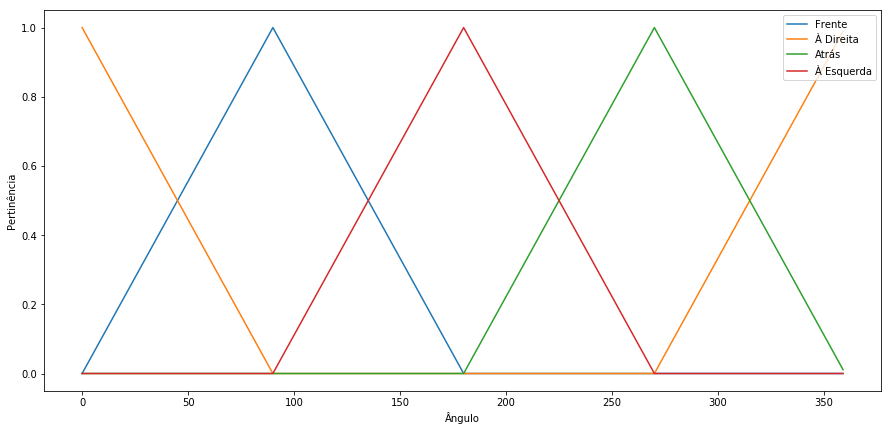

In [13]:
direita_frente = ConjuntoNebuloso("Direita à Frente", triangular, [-1, 0, 90])
direita_atras = ConjuntoNebuloso("Direita Atrás", triangular, [361, 360, 270])
direita = Composicao("À Direita",[direita_frente, direita_atras])
frente = ConjuntoNebuloso("Frente", triangular, [0, 90, 180])
esquerda = ConjuntoNebuloso("À Esquerda", triangular, [90, 180, 270])
atras = ConjuntoNebuloso("Atrás", triangular, [180, 270, 360])

objetivo = [frente, direita, atras, esquerda]

circulo = np.arange(0,360)

plt.figure(figsize=(15,7))

for conjunto in objetivo:
    pertinencias = [ conjunto.pertinencia(x) for x in circulo ]
    
    plot(circulo, pertinencias, label = conjunto.nome)
    
xlabel("Ângulo")
ylabel("Pertinência")
legend(loc='upper right', shadow=False)

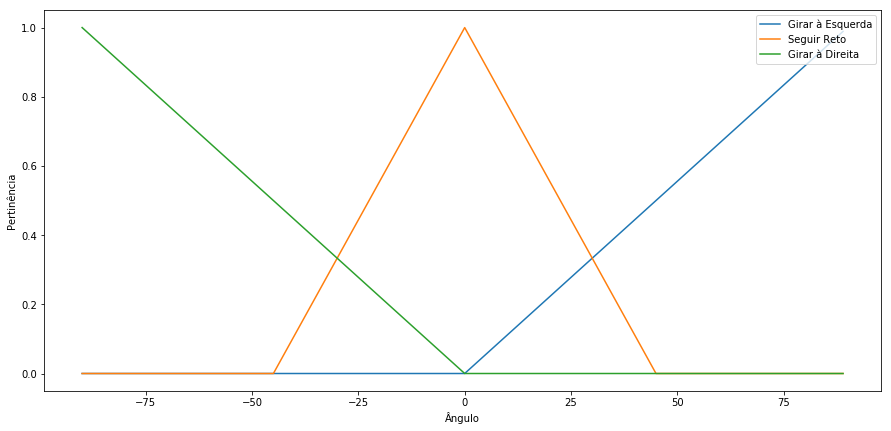

In [14]:
direcao_esquerda = ConjuntoNebuloso("Girar à Esquerda", triangular, [91, 90, 0])
direcao_reto = ConjuntoNebuloso("Seguir Reto", triangular, [-45, 0, 45])
direcao_direita = ConjuntoNebuloso("Girar à Direita", triangular, [0, -90, -91])

direcao = [direcao_esquerda, direcao_reto, direcao_direita]

circulo = np.arange(-90,90)

plt.figure(figsize=(15,7))

for conjunto in direcao:
    pertinencias = [ conjunto.pertinencia(x) for x in circulo ]
    
    plot(circulo, pertinencias, label = conjunto.nome)
    
xlabel("Ângulo")
ylabel("Pertinência")
legend(loc='upper right', shadow=False)


In [15]:
carro = ModeloMISO(["Objetivo","Direção Carro"],"Direção")

carro.adicionaRegra([frente, Conjuncao([frente, esquerda])], direcao_direita)
carro.adicionaRegra([frente, Conjuncao([frente, direita])], direcao_esquerda)
carro.adicionaRegra([frente, Conjuncao([atras, esquerda])], direcao_direita)
carro.adicionaRegra([frente, Conjuncao([atras, direita])], direcao_esquerda)

carro.adicionaRegra([Conjuncao([frente, esquerda]), Conjuncao([frente, esquerda])], direcao_reto)
carro.adicionaRegra([Conjuncao([frente, esquerda]), Conjuncao([frente, direita])], direcao_esquerda)
carro.adicionaRegra([Conjuncao([frente, esquerda]), Conjuncao([atras, esquerda])], direcao_direita)
carro.adicionaRegra([Conjuncao([frente, esquerda]), Conjuncao([atras, direita])], direcao_esquerda)

carro.adicionaRegra([Conjuncao([frente, direita]), Conjuncao([frente, esquerda])], direcao_direita)
carro.adicionaRegra([Conjuncao([frente, direita]), Conjuncao([frente, direita])], direcao_reto)
carro.adicionaRegra([Conjuncao([frente, direita]), Conjuncao([atras, esquerda])], direcao_direita)
carro.adicionaRegra([Conjuncao([frente, direita]), Conjuncao([atras, direita])], direcao_esquerda)

carro.adicionaRegra([atras, Conjuncao([frente, esquerda])], direcao_esquerda)
carro.adicionaRegra([atras, Conjuncao([frente, direita])], direcao_direita)
carro.adicionaRegra([atras, Conjuncao([atras, esquerda])], direcao_esquerda)
carro.adicionaRegra([atras, Conjuncao([atras, direita])], direcao_direita)

carro.adicionaRegra([Conjuncao([atras, esquerda]), Conjuncao([frente, esquerda])], direcao_esquerda)
carro.adicionaRegra([Conjuncao([atras, esquerda]), Conjuncao([frente, direita])], direcao_direita)
carro.adicionaRegra([Conjuncao([atras, esquerda]), Conjuncao([atras, esquerda])], direcao_reto)
carro.adicionaRegra([Conjuncao([atras, esquerda]), Conjuncao([atras, direita])], direcao_direita)

carro.adicionaRegra([Conjuncao([atras, direita]), Conjuncao([frente, esquerda])], direcao_esquerda)
carro.adicionaRegra([Conjuncao([atras, direita]), Conjuncao([frente, direita])], direcao_direita)
carro.adicionaRegra([Conjuncao([atras, direita]), Conjuncao([atras, esquerda])], direcao_esquerda)
carro.adicionaRegra([Conjuncao([atras, direita]), Conjuncao([atras, direita])], direcao_reto)

carro.adicionaRegra([esquerda, Conjuncao([frente, esquerda])], direcao_esquerda)
carro.adicionaRegra([esquerda, Conjuncao([frente, direita])], direcao_esquerda)
carro.adicionaRegra([esquerda, Conjuncao([atras, esquerda])], direcao_direita)
carro.adicionaRegra([esquerda, Conjuncao([atras, direita])], direcao_direita)

carro.adicionaRegra([direita, Conjuncao([frente, esquerda])], direcao_direita)
carro.adicionaRegra([direita, Conjuncao([frente, direita])], direcao_direita)
carro.adicionaRegra([direita, Conjuncao([atras, esquerda])], direcao_esquerda)
carro.adicionaRegra([direita, Conjuncao([atras, direita])], direcao_esquerda)


print(carro)

SE Objetivo = Frente E Direção Carro = Frente E À Esquerda ENTÃO Direção = Girar à Direita
SE Objetivo = Frente E Direção Carro = Frente E À Direita ENTÃO Direção = Girar à Esquerda
SE Objetivo = Frente E Direção Carro = Atrás E À Esquerda ENTÃO Direção = Girar à Direita
SE Objetivo = Frente E Direção Carro = Atrás E À Direita ENTÃO Direção = Girar à Esquerda
SE Objetivo = Frente E À Esquerda E Direção Carro = Frente E À Esquerda ENTÃO Direção = Seguir Reto
SE Objetivo = Frente E À Esquerda E Direção Carro = Frente E À Direita ENTÃO Direção = Girar à Esquerda
SE Objetivo = Frente E À Esquerda E Direção Carro = Atrás E À Esquerda ENTÃO Direção = Girar à Direita
SE Objetivo = Frente E À Esquerda E Direção Carro = Atrás E À Direita ENTÃO Direção = Girar à Esquerda
SE Objetivo = Frente E À Direita E Direção Carro = Frente E À Esquerda ENTÃO Direção = Girar à Direita
SE Objetivo = Frente E À Direita E Direção Carro = Frente E À Direita ENTÃO Direção = Seguir Reto
SE Objetivo = Frente E À Di

In [16]:
def distancia(a, b):
    a = np.array(a)
    b = np.array(b)
    return np.linalg.norm(a-b)

def angulo_polar(u):
    # utilizando coordenadas polares, acha o ângulo a partir da origem
    return np.degrees(np.arctan2( u[1], u[0] ))

def angulo(a, b):
    
    # coloca o ponto a como centro o centro do sist. de coord. polares
    x = [b[0] - a[0], b[1] - a[1]]
    
    ang = angulo_polar(x)
    
    return circular(ang)

def circular(ang):
    ang = ang + 360. if ang < 0 else ang 
    ang = ang % 360. if ang > 360 else ang 
    return ang

In [23]:
def simular():
    x = 0
    y = 1
    dir = np.random.uniform(0, 360)
    pos = np.random.uniform(10, 50, 2)
    obj = np.random.uniform(10, 90, 2)
    history = []

    plt.figure(figsize=(15,7))
    xlim((0,100))
    ylim((0,100))
    plot([pos[x]],[pos[y]],'o',ms=15)
    plot([obj[x]],[obj[y]],'X',ms=15)
    arrow(pos[x] ,pos[y], 5 * np.cos(dir * np.pi/180.0), 5* np.sin(dir * np.pi/180.0),head_width=2, 
          head_length=2, fc='k', ec='k')


    iteracoes = 0

    while distancia(pos, obj) > 2 and iteracoes < 200:
        iteracoes += 1
        last = pos
        ndir =  carro.processar([angulo(pos, obj), dir])
        dir = circular(dir + ndir) 
        pos[x] +=  np.cos(dir * np.pi/180.0)
        pos[y] +=  np.sin(dir * np.pi/180.0)
        if iteracoes % 5 == 0:
            arrow(pos[x] ,pos[y], 5 * np.cos(dir * np.pi/180.0), 5* np.sin(dir * np.pi/180.0),head_width=2, 
                  head_length=2, fc='k', ec='k')
        history.append([pos[x], pos[y]])

    plot([k[x] for k in history], [k[y] for k in history])

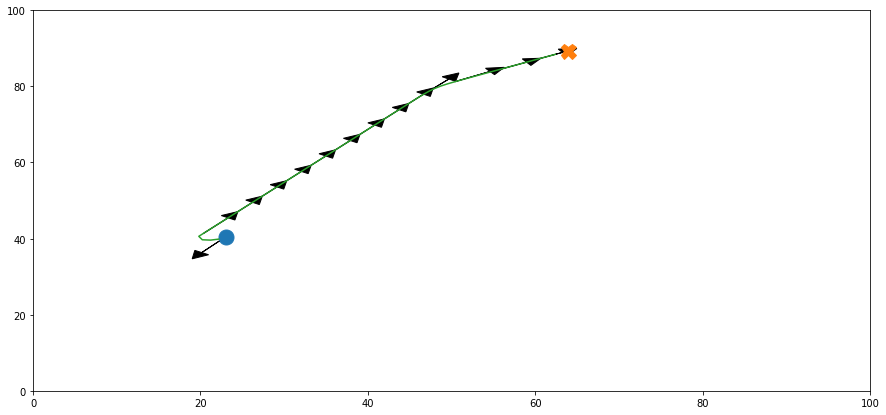

In [24]:
simular()